<center>
<h3>Deakin University</h3>
    <h4>SIG720-Machine Learning</h4>
   <h3>Pass Task 3</h3>
</center>
<div style="border-top:1px solid #d1d1d1; padding:4px">
<strong>Submitted by</strong>
    <br/>
Surendra Bahadur Rai
      <br/>
ID: 223940212
      <br/>
Date: aug 27th 2023
      <br/>
</div>
    
<h2>Task 3 Solution</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn import metrics
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# set matplotlib to display all plots inline with the notebook
%matplotlib inline

In [2]:
#Loading the digit dataset
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
#Digit dataset fill in pandas datafaime
df = pd.DataFrame(digits['data'])
df['label'] = digits['target']

In [4]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
60       0
61       0
62       0
63       0
label    0
Length: 65, dtype: int64

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [7]:
digit_df = df.copy()
digit_df= digit_df.iloc[:,1:]

In [8]:
digit_df.head()

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,label
0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<p> First,column all the records are 0.0  null value so that we are removing</p>

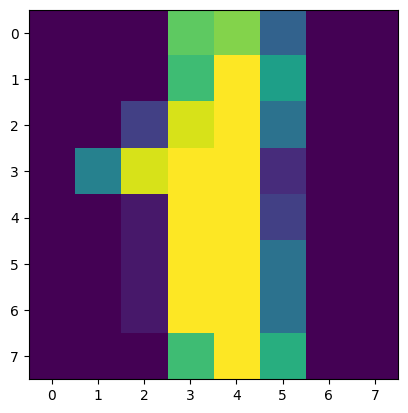

In [9]:
#Degit dataset show one image
plt.imshow(digits.images[1])
plt.show()

In [10]:
digit_X=digit_df.iloc[:,:63].values

## Digit Dataset trasforming standardardscaler

In [11]:
#dataset Standardize
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(digit_X)
y = df['label']

## Spliting the train and test data for Knn Clasification

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.20, random_state = 0)

## Knn Classification Model

In [13]:
# Initialize the KNN classifier
knn_classifire = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifire.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifire.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      1.00      0.99        35
           2       1.00      0.97      0.99        36
           3       0.90      0.97      0.93        29
           4       0.97      0.97      0.97        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.95      0.97      0.96        39
           8       0.97      0.92      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [14]:
rmse_val = [] 
for n in range(20):
    n = n+1
    #Defining the Knn Regration
    knnRg = KNeighborsRegressor(n_neighbors = n)
    #Fitting Data x_train and y_train on knn-regression model
    knnRg.fit(X_train, y_train)
    #Test data Prediction
    pred=knnRg.predict(X_test)
    #calculate MSE of test Prediction
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for n_neighbors= ', n , 'is:', error)

RMSE value for n_neighbors=  1 is: 0.711024300256718
RMSE value for n_neighbors=  2 is: 0.5645794895318107
RMSE value for n_neighbors=  3 is: 0.5818764876789405
RMSE value for n_neighbors=  4 is: 0.6009252125773316
RMSE value for n_neighbors=  5 is: 0.6386617953885209
RMSE value for n_neighbors=  6 is: 0.6391907499446584
RMSE value for n_neighbors=  7 is: 0.6701862874335356
RMSE value for n_neighbors=  8 is: 0.7001053988110965
RMSE value for n_neighbors=  9 is: 0.7166690592361249
RMSE value for n_neighbors=  10 is: 0.7490364180435792
RMSE value for n_neighbors=  11 is: 0.7578635816874416
RMSE value for n_neighbors=  12 is: 0.7825621696598399
RMSE value for n_neighbors=  13 is: 0.7979263064547655
RMSE value for n_neighbors=  14 is: 0.813017670426851
RMSE value for n_neighbors=  15 is: 0.836534591906868
RMSE value for n_neighbors=  16 is: 0.8525200083184754
RMSE value for n_neighbors=  17 is: 0.8768784417550494
RMSE value for n_neighbors=  18 is: 0.9108024168413287
RMSE value for n_neigh

In [15]:
#Pd dataframe convert and plotting the rmse values against k values
rsme_curve = pd.DataFrame(rmse_val, columns=["RSME"])

In [16]:
rsme_curve

,RSME
0,0.711024
1,0.564579
2,0.581876
3,0.600925
4,0.638662
5,0.639191
6,0.670186
7,0.700105
8,0.716669
9,0.749036


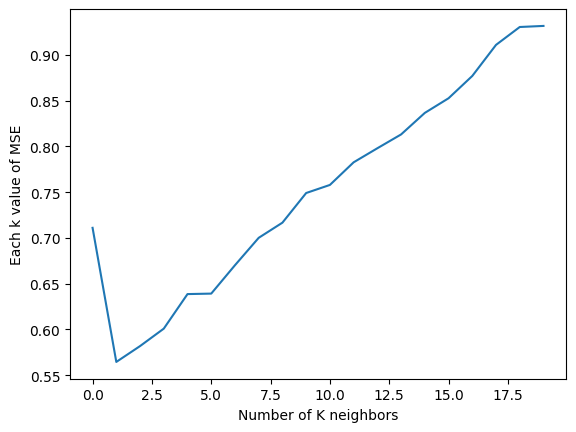

In [17]:
#Ploting Regression RMSE Elbo Curve
plt.plot(range(0, 20), rsme_curve)
plt.xlabel("Number of K neighbors")
plt.ylabel("Each k value of MSE")
plt.show()


<p> Nighbors 1 to 20 K value of maximum rsme value is 0.90 onword it's showing falt line  </a>

## Using K-Mean Clusting

In [18]:
k = 10
kmeans_cluster = KMeans(init = "random",n_clusters = k, n_init = 10,random_state = 0)
kmeans_plus_cluster = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)

In [19]:
def bech_mark_kmeans(estimator, name, data):
    estimator.fit(data)
    print("Initial-cluster Name:" + name)
    print("Homogeneity: {0:0.3f}".format(metrics.homogeneity_score(y, estimator.labels_)))
    print("Completeness: {0:0.3f}".format(metrics.completeness_score(y, estimator.labels_)))
    print("V_measure: {0:0.3f}".format(metrics.v_measure_score(y, estimator.labels_)))
    print("Adjusted random: {0:0.3f}".format(metrics.adjusted_rand_score(y, estimator.labels_)))
    print("Adjusted mutual info: {0:0.3f}".format(metrics.adjusted_mutual_info_score(y, estimator.labels_)))
    print("Silhouette: {0:0.3f}".format(metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=300)))

In [20]:
bech_mark_kmeans(estimator=kmeans_cluster, name="random", data=scaled_data)

Initial-cluster Name:random
Homogeneity: 0.681
Completeness: 0.723
V_measure: 0.701
Adjusted random: 0.574
Adjusted mutual info: 0.698
Silhouette: 0.119


In [21]:
bech_mark_kmeans(estimator=kmeans_plus_cluster, name="k-means++", data=scaled_data)

Initial-cluster Name:k-means++
Homogeneity: 0.603
Completeness: 0.651
V_measure: 0.626
Adjusted random: 0.468
Adjusted mutual info: 0.622
Silhouette: 0.150


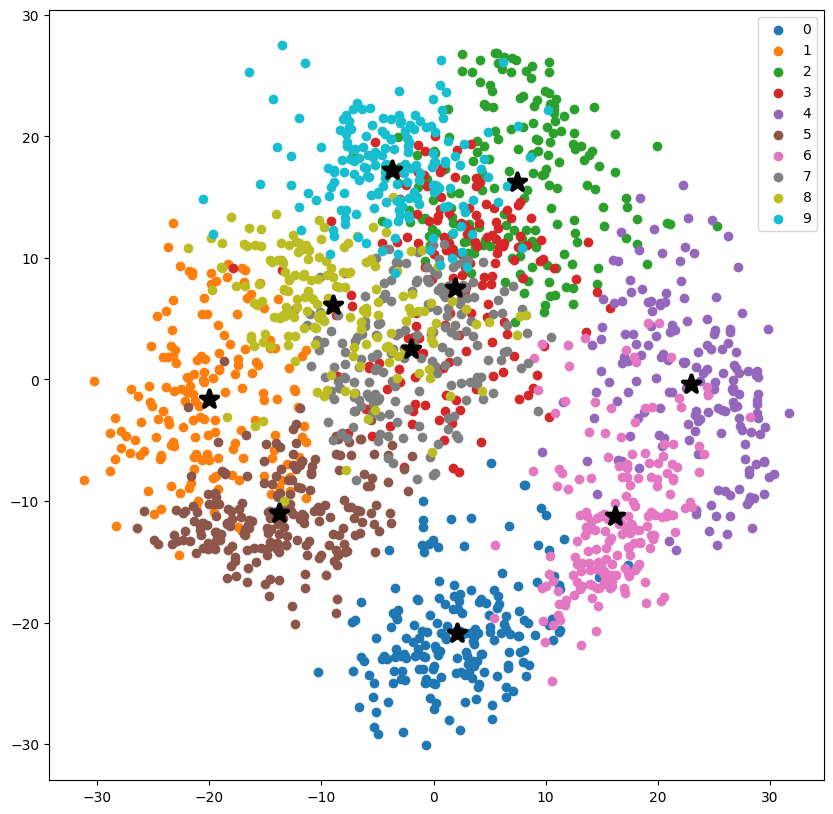

In [22]:
#Row Dataset withoutScale Reducing the dataset
pca = PCA(3)
reduced_data = pca.fit_transform(digit_X)
kmeans_cluster.fit(reduced_data)
# Calculating the centroids
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.fit_predict(reduced_data)
unique_labels = np.unique(label)
# plotting the clusters:
plt.figure(figsize=(10, 10))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],reduced_data[label == i, 1],label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],marker='*', s=169, linewidths=3,color='k', zorder=10)
plt.legend()
plt.show()

In [23]:
#Finding Optimal Value of KMenas

In [24]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 12):
    kmeans_model = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)
    kmeans_model.fit(scaled_data)
    sse.append(kmeans_model.inertia_)

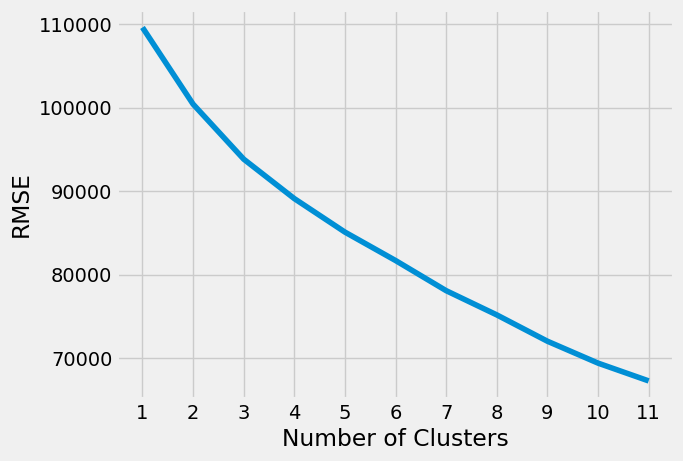

In [25]:
#Finding Elbow 
plt.style.use("fivethirtyeight")
plt.plot(range(1, 12), sse)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("RMSE")
plt.show()

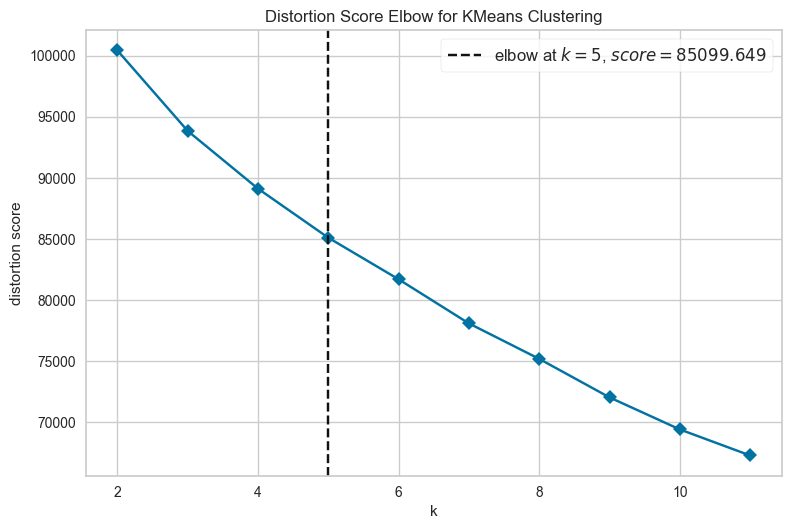

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
#Finding Optimal value fo k Kmeans
from yellowbrick.cluster import KElbowVisualizer
X=scaled_data
KMeans_model = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)
visualizer = KElbowVisualizer(
    KMeans_model, k=(2,12), metric='distortion', timings=False
) 
visualizer.fit(X)
visualizer.show()

## DecisionTreeClassifier Model & Logistic Regression

In [30]:
#DecisionTreeClassifier Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

## 50-50%  Train and Test data seperation and Model Performace Metrix

In [33]:
#50-50% Train and Test data sepertion Model test
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.5, random_state=5)

In [34]:
# Create a decision tree classifier
DT_Classifier_model = DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=5)
# Train the model on the training data
DT_Classifier_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = DT_Classifier_model.predict(X_test)

In [35]:
#Logistic Regression Modle
LR_model = LogisticRegression(solver='liblinear')
LR_model.fit(X_train, y_train)
predicted = LR_model.predict(X_test)
report = classification_report(y_test, predicted)

In [36]:
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        93
           1       0.92      0.96      0.94        94
           2       0.95      1.00      0.98        82
           3       0.98      0.90      0.94       104
           4       1.00      0.94      0.97        84
           5       0.94      0.97      0.96       102
           6       0.99      0.96      0.98        84
           7       0.97      0.97      0.97        94
           8       0.89      0.91      0.90        82
           9       0.93      0.94      0.93        80

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



In [37]:
# Evaluate the model performance on the test set
accuracy = DT_Classifier_model.score(X_test, y_test)
print("Accuracy: %0.2f" % accuracy)

Accuracy: 0.85


## 70 -30%  Train and Test data seperation and Model Performace Metrix

In [40]:
#70-30% Train and Test data sepertion Model test
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=5)

In [41]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=5)
# Train the model on the training data
dt_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [42]:
LR_model = LogisticRegression(solver='liblinear')
LR_model.fit(X_train, y_train)
predicted = LR_model.predict(X_test)
report = classification_report(y_test, predicted)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.94      0.98      0.96        52
           2       0.95      1.00      0.97        58
           3       0.98      0.90      0.94        59
           4       1.00      0.95      0.98        43
           5       0.94      0.98      0.96        64
           6       1.00      0.96      0.98        47
           7       0.97      0.97      0.97        59
           8       0.94      0.94      0.94        50
           9       0.92      0.94      0.93        50

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [44]:
# Evaluate the model performance on the test set
accuracy = dt_classifier.score(X_test, y_test)
print("Accuracy: %0.2f" % accuracy)

Accuracy: 0.83


<p> 
Create two more KNN-based classification models using the dataset used in Q1 by varying 
distance metrics such as using cityblock and cosine. 
<br>
Report the performances of the  developed models including Q1 and explain the similarity or differences if any
</p>

Note: Manhatten distance also call the city block distrance


In [45]:
# List of distance metrics
distance= ['euclidean', 'manhattan', 'cosine']
distance_metrics_rsme = [];

for metric_name in distance:
    print(f"Using {metric_name} distance:")
    # Initialize the KNN classifier 5 neighbor with distance metrix
    knn_cls = KNeighborsClassifier(n_neighbors=5, metric=metric_name)
    # Fit the model on the training data
    knn_cls.fit(X_train, y_train)
    # predictions on the test data
    y_pred = knn_cls.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Generate a classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)
    print("-----------------Regression-----------------------")
    #Each Metrix KnnRegression
    knnRegs = KNeighborsRegressor(n_neighbors = n)
    #Fitting Data x_train and y_train on knn-regression model
    knnRegs.fit(X_train, y_train)
    #Test data Prediction
    pred=knnRegs.predict(X_test)
    #calculate MSE of test Prediction
    error = sqrt(mean_squared_error(y_test,pred))
    print("Distrance ", metric_name)
    print("RMSE:",error)
    distance_metrics_rsme.append(error)
    print("\n")

Using euclidean distance:
Accuracy: 0.975925925925926
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.93      0.98      0.95        52
           2       0.98      0.98      0.98        58
           3       1.00      0.98      0.99        59
           4       0.98      0.95      0.96        43
           5       0.96      1.00      0.98        64
           6       0.98      0.98      0.98        47
           7       0.97      0.97      0.97        59
           8       1.00      0.96      0.98        50
           9       0.98      0.94      0.96        50

    accuracy                           0.98       540
   macro avg       0.98      0.97      0.98       540
weighted avg       0.98      0.98      0.98       540

-----------------Regression-----------------------
Distrance  euclidean
RMSE: 0.9191607484447328


Using manhattan distance:
Accuracy: 0.9740740740740741
Classific

In [46]:
#cosine similarity of k-means

In [47]:
# import the cosine_similarity & cityblock library 
from scipy.spatial.distance import cityblock
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
df_cosine=pd.DataFrame(cosine_similarity(scaled_data,dense_output=True))

In [49]:
df_cosine

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,1.000000,-0.577569,-0.228853,-0.239851,0.042603,0.103545,-0.199368,-0.158084,0.016848,0.166372,...,0.154746,0.155971,-0.120120,-0.306608,0.114223,0.338315,0.701166,-0.213892,0.324552,-0.054382
1,-0.577569,1.000000,0.269295,0.020262,0.145841,0.005518,0.313778,0.011418,-0.117004,-0.193840,...,-0.204565,0.103977,0.177682,0.438375,0.137702,-0.254622,-0.385157,0.320715,-0.058379,-0.189549
2,-0.228853,0.269295,1.000000,-0.275912,0.118925,-0.238069,0.177615,0.069884,0.143036,-0.225279,...,-0.483001,0.319328,0.097325,0.240008,0.312984,-0.205024,-0.058471,0.322998,-0.155288,0.207376
3,-0.239851,0.020262,-0.275912,1.000000,-0.064490,0.370054,-0.046848,-0.249299,0.108879,0.097030,...,0.219797,-0.237733,-0.102601,-0.042775,-0.392389,0.101455,-0.393069,-0.204672,-0.084786,0.094671
4,0.042603,0.145841,0.118925,-0.064490,1.000000,-0.057791,0.387987,-0.072455,-0.126976,-0.131249,...,0.028734,0.763548,-0.170391,0.019591,0.643582,-0.079610,0.042104,0.123566,-0.060592,-0.095788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.338315,-0.254622,-0.205024,0.101455,-0.079610,0.537063,-0.260482,-0.220940,0.160469,0.327100,...,0.433148,-0.118206,-0.310929,-0.180716,-0.204845,1.000000,0.226336,-0.014625,0.671955,0.030674
1793,0.701166,-0.385157,-0.058471,-0.393069,0.042104,-0.002155,0.030988,-0.241993,-0.030009,0.016008,...,0.165805,0.298700,-0.108731,-0.233100,0.284636,0.226336,1.000000,0.021418,0.210793,0.009459
1794,-0.213892,0.320715,0.322998,-0.204672,0.123566,-0.002020,0.507672,-0.131590,0.336178,-0.139815,...,0.032087,0.096053,0.415210,0.572312,0.198551,-0.014625,0.021418,1.000000,0.080169,0.369997
1795,0.324552,-0.058379,-0.155288,-0.084786,-0.060592,0.464050,-0.103266,-0.241277,0.294666,0.534985,...,0.190917,0.024071,-0.258800,-0.130913,0.062750,0.671955,0.210793,0.080169,1.000000,0.061102


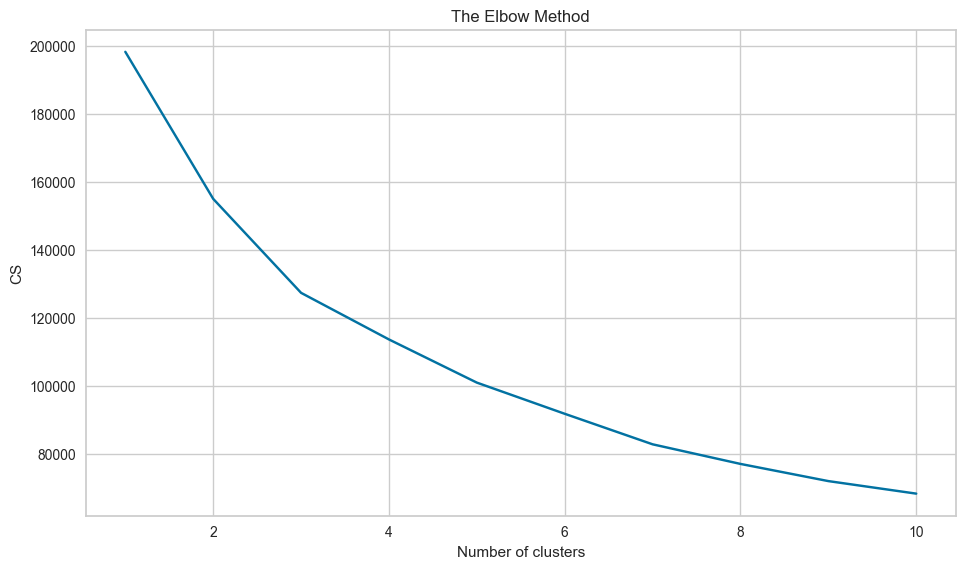

In [50]:
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cosine)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [51]:
#Crete PCA 
pca = PCA(2)
#Transform the data
pca_transform = pca.fit_transform(df_cosine)
#Initialize the class object
kmeans = KMeans(n_clusters= 3,n_init = 'auto')
#predict the labels of clusters.
label = kmeans.fit_predict(pca_transform)
#Getting unique labels
u_labels = np.unique(label)

In [52]:
display(u_labels,label)

array([0, 1, 2])

array([0, 1, 1, ..., 1, 0, 2])

In [53]:
kmeans.cluster_centers_

array([[ 6.71866147, -2.53021579],
       [-0.89909978,  4.87798157],
       [-5.46583962, -3.25870261]])

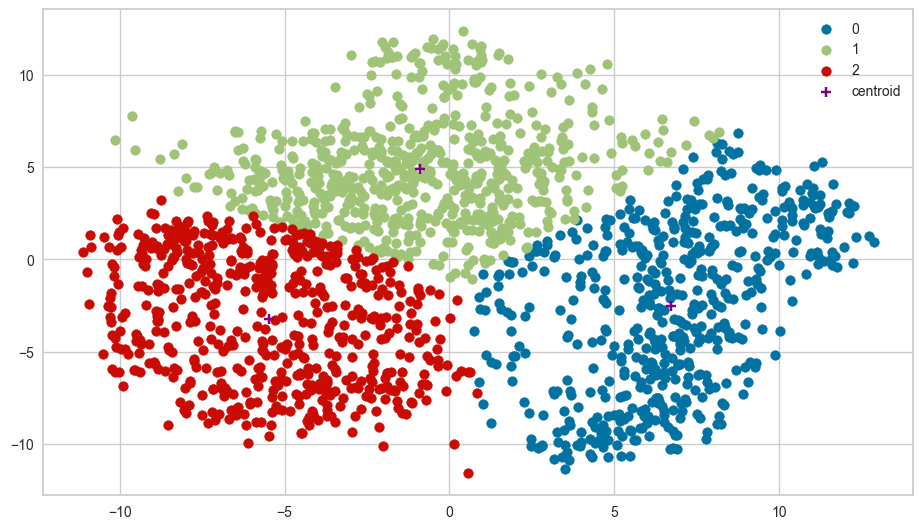

In [54]:
#Cosine Similarigy plotting the results:
plt.figure(figsize=(10,6))
for i in u_labels:
    plt.scatter(pca_transform[label == i , 0] , pca_transform[label == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.legend()
plt.savefig('cluster.png')
plt.show()

In [55]:
#Model Performance Matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.88      0.98      0.93        52
           2       0.98      0.98      0.98        58
           3       1.00      0.95      0.97        59
           4       1.00      0.98      0.99        43
           5       0.96      1.00      0.98        64
           6       0.98      0.98      0.98        47
           7       0.98      0.97      0.97        59
           8       0.96      0.90      0.93        50
           9       0.94      0.92      0.93        50

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [56]:
from sklearn.preprocessing import StandardScaler
std_scaled= StandardScaler()
std_scaled.fit(digits.data)
X = std_scaled.fit_transform(digits.data, y=None)
Y = digits.target

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,n_init='auto', random_state=42) 
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [58]:
# make a prediction on the data
p_labels = kmeans.predict(X)
print(p_labels)

[1 2 3 ... 2 4 4]


In [59]:
kmeans.inertia_

82014.45447499015

In [60]:
labels = kmeans.labels_
print(labels)

[1 2 3 ... 2 4 4]


In [61]:
# check how many of the samples were correctly labeled
correct_labels = sum(Y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))

Result: 170 out of 1797 samples were correctly labeled.
Accuracy score: 0.09


In [62]:
centroids = kmeans.cluster_centers_

In [63]:
from scipy.spatial import distance
#Citiblok Distrance
def custom_distance(A, B, mname):
    distances = distance.cdist(A, B, mname)
    return distances

In [64]:
#Distance Calculation of kmena centroid
centroids = kmeans.cluster_centers_
cityblock_distance =custom_distance(centroids,centroids,'cityblock') 
cosine_distance =custom_distance(centroids,centroids,'cosine') 
euclidean_distance =custom_distance(centroids,centroids,'euclidean') 

In [65]:
#Cosine Distrance
cosine_distance

array([[0.00000000e+00, 1.14725493e+00, 1.25192412e+00, 6.72375240e-01,
        1.22568795e+00, 8.41451755e-01],
       [1.14725493e+00, 0.00000000e+00, 1.44521144e+00, 1.57894275e+00,
        1.15642035e+00, 6.99678805e-01],
       [1.25192412e+00, 1.44521144e+00, 0.00000000e+00, 1.20026210e+00,
        1.14103703e+00, 1.43128793e+00],
       [6.72375240e-01, 1.57894275e+00, 1.20026210e+00, 0.00000000e+00,
        1.23603300e+00, 8.69726291e-01],
       [1.22568795e+00, 1.15642035e+00, 1.14103703e+00, 1.23603300e+00,
        1.11022302e-16, 1.64398213e+00],
       [8.41451755e-01, 6.99678805e-01, 1.43128793e+00, 8.69726291e-01,
        1.64398213e+00, 1.11022302e-16]])

In [66]:
labels = kmeans.labels_
print(labels)

[1 2 3 ... 2 4 4]


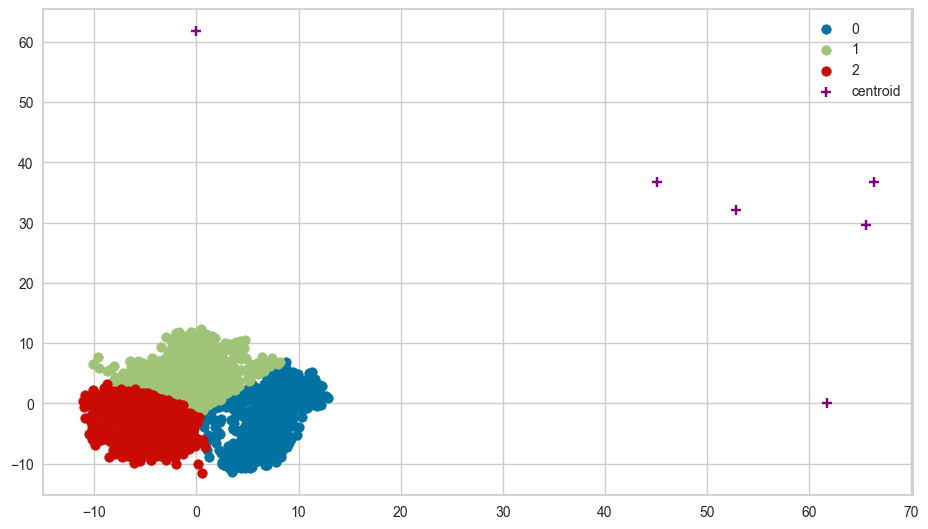

In [67]:
#Cityblock plotting the results:
plt.figure(figsize=(10,6))
for i in u_labels:
    plt.scatter(pca_transform[label == i , 0] , pca_transform[label == i , 1] , label = i)
plt.scatter(cityblock_distance[:,0],cityblock_distance[:,1],color='purple',marker='+',label='centroid')
plt.legend()
plt.savefig('cityblock.png')
plt.show()

<strong>4 Creating random forest model using HR-Employee-Attrition.csv dataset and improve the 
result using hyperparameter tuning. Hints. Visualise your performance fluctuation for 
different hyperparameter values </strong>

In [68]:
#Import libray
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [69]:
#Loading HR employee attriion
df_hr_employee = pd.read_csv("HR-Employee-Attrition.csv")

In [70]:
df_hr_employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [71]:
df_hr_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [72]:
#just checking dublicate value and  shape of data
print(df_hr_employee.duplicated().sum())
print(df_hr_employee.shape)

0
(1470, 35)


In [73]:
#missing value checking 
df_hr_employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [74]:
#Here Yes and No Categorical value change Label Encoding yes=1 and no =0
df_hr_employee['Attrition'] = df_hr_employee['Attrition'].map({"No":0, "Yes":1})

In [75]:
df_hr_employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [76]:
#copy the Object
hr_employee_data = df_hr_employee.copy()
# Import label encoder
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
hr_employee_data['BusinessTravel']= label_encoder.fit_transform(hr_employee_data['BusinessTravel'])
hr_employee_data['Department']= label_encoder.fit_transform(hr_employee_data['Department'])
hr_employee_data['EducationField']= label_encoder.fit_transform(hr_employee_data['EducationField'])

hr_employee_data['Gender']= label_encoder.fit_transform(hr_employee_data['Gender'])
hr_employee_data['Over18']= label_encoder.fit_transform(hr_employee_data['Over18'])
hr_employee_data['OverTime']= label_encoder.fit_transform(hr_employee_data['OverTime'])
hr_employee_data['JobRole']= label_encoder.fit_transform(hr_employee_data['JobRole'])
hr_employee_data['MaritalStatus']= label_encoder.fit_transform(hr_employee_data['MaritalStatus'])



In [77]:
#Printing Uniqe Lable each categorical data
print("Label Encoding Here:")
print(df_hr_employee["BusinessTravel"].unique(),"=>", hr_employee_data["BusinessTravel"].unique() )
print(df_hr_employee["Department"].unique(), "=>", hr_employee_data["Department"].unique())
print(df_hr_employee["EducationField"].unique(), "=>", hr_employee_data["EducationField"].unique())

print(df_hr_employee["Gender"].unique(), "=>", hr_employee_data["Gender"].unique())
print(df_hr_employee["Over18"].unique(), "=>", hr_employee_data["Over18"].unique())
print(df_hr_employee["OverTime"].unique(), "=>", hr_employee_data["OverTime"].unique())
print(df_hr_employee["JobRole"].unique(), "=>", hr_employee_data["JobRole"].unique())
print(df_hr_employee["MaritalStatus"].unique(), "=>", hr_employee_data["MaritalStatus"].unique())

Label Encoding Here:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] => [2 1 0]
['Sales' 'Research & Development' 'Human Resources'] => [2 1 0]
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] => [1 4 3 2 5 0]
['Female' 'Male'] => [0 1]
['Y'] => [0]
['Yes' 'No'] => [1 0]
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] => [7 6 2 4 0 3 8 5 1]
['Single' 'Married' 'Divorced'] => [2 1 0]


In [78]:
#Decribe all data
hr_employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [79]:
#Decribe all data
hr_employee_data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [80]:
hr_employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [81]:
#seperate Target value y vaoue from the data set
X = hr_employee_data.drop(['Attrition'],axis=1)
y = hr_employee_data['Attrition']

In [82]:
#Spliting Data train and Test

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import time

In [85]:
standard_Scaler = StandardScaler()
X_train_sc = standard_Scaler.fit_transform(X_train)  
X_test_sc = standard_Scaler.transform(X_test)

In [86]:
# function for training and model_evaluation
def model_evaluation(xtr,ytr,xte,yte,model):
    model.fit(xtr,ytr)
    # Prediction for Test and Train Dataset
    test_pred=model.predict(xte)
    train_pred =model.predict(xtr)
    tpr_score = metrics.precision_score(ytr, train_pred)
    trc_score = metrics.recall_score(ytr, train_pred)
    tac_score =metrics.accuracy_score(ytr,train_pred)
    print("For Training Dataset.")   
    print(f'Accuracy: {tac_score:.2f}, Precision: {tpr_score:.2f}, Recall: {trc_score:.2f}')
    print("===============================")
    pr_score = metrics.precision_score(yte, test_pred)
    rc_score = metrics.recall_score(yte, test_pred)
    ac_score = metrics.accuracy_score(yte, test_pred)
    
    print("For Testing Dataset")
    print("===============================")
    print("F1:",metrics.f1_score(yte, test_pred))
    print(f'Accuracy: {ac_score:.2f}, Precision: {pr_score:.2f}, Recall: {rc_score:.2f}')
    print("")
    print(classification_report(yte,test_pred))
    # Plot non-normalized confusion matrix
    

In [87]:
#Random Forest Model
Rfclf_model = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=9)
print("Model Name : Random Forest")
model_evaluation(X_train,y_train,X_test,y_test,Rfclf_model)

Model Name : Random Forest
For Training Dataset.
Accuracy: 0.96, Precision: 1.00, Recall: 0.74
For Testing Dataset
F1: 0.21875
Accuracy: 0.83, Precision: 0.78, Recall: 0.13

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       239
           1       0.78      0.13      0.22        55

    accuracy                           0.83       294
   macro avg       0.80      0.56      0.56       294
weighted avg       0.82      0.83      0.78       294



In [88]:
#Dession Tree Classifire 
model_dt = DecisionTreeClassifier(random_state=11,max_depth=10, criterion = "gini")
print("Model Name : Decision Tree")
model_evaluation(X_train,y_train,X_test,y_test,model_dt)

Model Name : Decision Tree
For Training Dataset.
Accuracy: 0.98, Precision: 1.00, Recall: 0.90
For Testing Dataset
F1: 0.4444444444444444
Accuracy: 0.80, Precision: 0.45, Recall: 0.44

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       239
           1       0.45      0.44      0.44        55

    accuracy                           0.80       294
   macro avg       0.66      0.66      0.66       294
weighted avg       0.79      0.80      0.79       294



<h3>Hyper-Parameter Optimization using GridSearchCV for Random Forest Classifier </h3>

In [ ]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)
start = time.time()
param_dist = {'max_depth': [7,8,9,10],
              'max_features': ['sqrt','log2'],
              'criterion': ['gini','entropy','log_loss'],
              'min_samples_split':[8,9,11,12],
              'min_samples_leaf':[8,9,11,13]}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)
cv_rf.fit(X_train, y_train.ravel())

best_rf_params = cv_rf.best_params_
print('Best Parameters using grid search: \n', cv_rf.best_params_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

C:\Users\farenrai\AppData\Local\Temp\ipykernel_10724\1178650198.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_rf.fit(X_train, y_train.ravel())


In [ ]:
#Model refinement
best_rf_model = RandomForestClassifier(
    max_depth=best_rf_params['max_depth'],
    max_features=best_rf_params['max_features'],
    criterion=best_rf_params['criterion'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf =best_rf_params['min_samples_leaf'],
    random_state=42
)
best_rf_model.fit(X_train, y_train)
# Evaluate the refined model
accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#apply GradientBoosting Classifier 
gboost_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100,max_features=5)
# Fit train data to gboot classifier
gboost_clf.fit(X_train,y_train)

#GBC Predict on test data
t_predic = gboost_clf.predict(X_test)

#Finding GBS Accuracy
print("\nGradient Boosting Classifier Accuracy is= %2.2f\n" % accuracy_score(y_test, t_predic))

#Gradient boosting Classifier prediction report
gboot_reports = classification_report(y_test, t_predic)
print(gboot_reports)
print("\n")
print("Confusion Metrix\n",confusion_matrix(y_test, gboost_clf.predict(X_test)))
print("--------------------------------------------------------")

#Apply Gradientbooting Regression model
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
gbr_predic = gbr.predict(X_test)

gb_rsme = sqrt(mean_squared_error(y_test, gbr_predic))
print("RSME:",gb_rsme)
print("Regression Score=",gbr.score(X_test, y_test))


In [ ]:
conf_matrix =confusion_matrix(y_test, gboost_clf.predict(X_test))
# Print the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**GradientBoosting Classifirer Hyper Parameter Model Tuning with GridSearchCV**

In [ ]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print('Best Parameters using grid search: \n',best_params)

## Model Refinement 

In [ ]:
#Model refinement
best_gb_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

best_gb_model.fit(X_train, y_train)

# Evaluate the refined model
accuracy = best_gb_model.score(X_test, y_test)
print("Accuracy:", accuracy)


## using Xgboot Model required to install pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
#difine the xgb classifire and Regression model
xgboot_model = xgb.XGBClassifier()
xgb_reg = xgb.XGBRegressor()

# train data fiting on Classsification and Regression model
xgboot_model.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)

#Predicting text data for classification and regression
predicted_ycls = xgboot_model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, predicted_ycls)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("\n")
print(classification_report(y_test, predicted_ycls))
print("----------Confusion Matrix----------------------\n")
print(confusion_matrix(y_test, predicted_ycls))

print("------------------------------------------------")
predicted_yreg = xgb_reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predicted_yreg, squared=False))
print(f"RMSE of the base model: {rmse:.3f}")


In [ ]:
#visualie matrix
cfm = confusion_matrix(y_test, predicted_ycls)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])
cm_display.plot()
plt.show()

## Finding Best parameter XgbClassfier Model Q3 and Q4

In [ ]:
#Finding Best parameter XgbClassfier Model
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}
# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(best_xgb_model)
print("\n")
print(best_xgb_params)

In [ ]:
#Xggb boost Modele refinement 
xgb_best_model =  xgb.XGBClassifier(
    n_estimators = best_xgb_params['n_estimators'],
    learning_rate = best_xgb_params['learning_rate'],
    max_depth = best_xgb_params['max_depth'],
    min_child_weight = best_xgb_params['min_child_weight'],
    random_state=42
)
xgb_best_model.fit(X_train, y_train)
xgb_accuracy = xgb_best_model.score(X_test, y_test)
print("XGBost Classifire Accuracy", xgb_accuracy)

In [ ]:
#Finding Best model and bset params of Randomforest
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
print("Best Model Params")
print(best_rf_model)
print("\n")
print(best_rf_params)

In [ ]:
#Model Refinement of best params
best_rf_model = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    random_state=42)
best_rf_model.fit(X_train, y_train)
best_rf_accuracy = best_rf_model.score(X_test, y_test)
print("Best Random forest Accuracy:", best_rf_accuracy)

In [ ]:
#Finding Best params of Knn
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9,10],
    'weights': ['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_
print("Best Model Params")
print(best_knn_model)
print("\n")
print(best_knn_params)

In [ ]:
#Model Refinement of best params of Knn
best_knn_model = KNeighborsClassifier(
    n_neighbors=best_knn_params['n_neighbors'],
    weights=best_knn_params['weights'],
    algorithm=best_knn_params['algorithm'],
    p=best_knn_params['p'])

best_knn_model.fit(X_train, y_train)
best_knn_accuracy = best_knn_model.score(X_test, y_test)
print("Best Random forest Accuracy:", best_knn_accuracy)

In [ ]:
# Model Evaluation Summary
xgb_accuracy = xgb_best_model.score(X_test, y_test)
rf_accuracy = best_rf_model.score(X_test, y_test)
knn_accuracy = best_knn_model.score(X_test, y_test)
# Compare accuracies
print("XGBoost Accuracy:", xgb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("KNN Accuracy:", knn_accuracy)


<h3> Reference</h3> 
<ul>
      <li> <a href="https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/"> analytics viidha.com</a></li>
      <li> <a href="https://realpython.com/knn-python/" > https://realpython.com/knn-python/</a> </li>
      <li> <a href="https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/" >https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/ </a> </li>
      <li> <a href="https://www.kaggle.com/code/codingan/employee-attrition-prediction-acc-88-1"> https://www.kaggle.com/code/codingan/employee-attrition-prediction-acc-88-1</a> </li>
    <li> <a href="https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/"> Machine Learing master</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html"> scikit-learn website</a></li>
    
   </ul>